# Lecture 23 Classification Methods

## 23.0 Setup

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as ss
import math
import random

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import (datasets,
                     metrics,
                     compose,
                     impute,
                     preprocessing,
                     pipeline,
                     model_selection as skms,
                     linear_model,
                     naive_bayes,
                     tree,
                     neighbors)

In [3]:
import tensorflow as tf

In [4]:
## Ignore deprecation and future, and user warnings.
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

In [5]:
import math
from datetime import datetime


## 23.1 What is Classification?


### 23.11 Introduction

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

For example, spam detection in email service providers can be identified as a classification problem. This is s binary classification since there are only 2 classes as spam and not spam. A classifier utilizes some training data to understand how given input variables relate to the class. In this case, known spam and non-spam emails have to be used as the training data. When the classifier is trained accurately, it can be used to detect an unknown email.

Classification belongs to the category of supervised learning where the targets also provided with the input data. There are many applications in classification in many domains such as in credit approval, medical diagnosis, target marketing etc.

There are two types of learners in classification as lazy learners and eager learners.

### 23.12 Terminology

Few of the terminologies encountered in machine learning – classification:

**1. Classifier:** An algorithm that maps the input data to a specific category.

**2. Classification model:** A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.

**3. Feature:** A feature is an individual measurable property of a phenomenon being observed.

**4. Binary Classification:** Classification task with two possible outcomes. Eg: Gender classification (Male / Female)

**5. Multi class classification:** Classification with more than two classes. In multi class classification each sample is assigned to one and only one target label. Eg: An animal can be cat or dog but not both at the same time

**6. Multi label classification:** Classification task where each sample is mapped to a set of target labels (more than one class). Eg: A news article can be about sports, a person, and location at the same time.

---
The following are the steps involved in building a classification model:

>**Initialize** the classifier to be used.

>**Train the classifier:** All classifiers in scikit-learn uses a fit(X, y) method to fit the model(training) for the given train data X and train label y.

>**Predict the target:** Given an unlabeled observation X, the predict(X) returns the predicted label y.

>**Evaluate** the classifier model


## 23.2 Classification Algorithms


In [6]:
df = pd.read_csv('../data/df.csv')
train = df[df['flag']=='train']
test = df[df['flag']=='test']

In [7]:
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

y_train = train['y']
x_train = train[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_train = pd.get_dummies(x_train,columns=cat_feats,drop_first=True)

y_test = test['y']
x_test = test[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_test = pd.get_dummies(x_test,columns=cat_feats,drop_first=True)

---
### 23.21 Logistic Regression

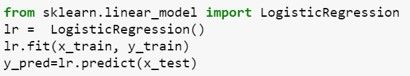

**Definition:** Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

**Advantages:** Logistic regression is designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.

**Disadvantages:** Works only when the predicted variable is binary, assumes all predictors are independent of each other, and assumes data is free of missing values.

In [8]:
lr =  LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

In [9]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[11602   833]
 [ 1676  2170]]
accuracy: 0.8458939868558443
precision: 0.7226107226107226
recall: 0.5642225689027561
f1 score:  0.6336691487808439


---
### 23.22 K-Nearest Neighbours

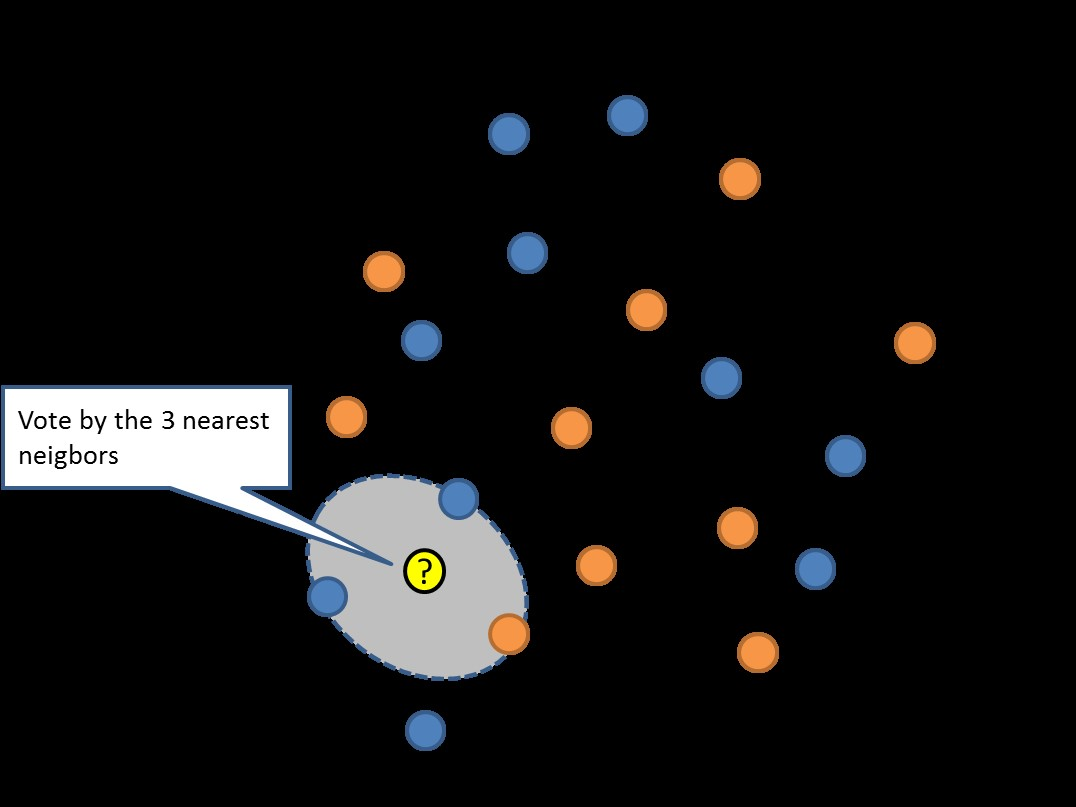

k-Nearest Neighbor is a lazy learning algorithm which stores all instances correspond to training data points in n-dimensional space. When an unknown discrete data is received, it analyzes the closest k number of instances saved (nearest neighbors)and returns the most common class as the prediction and for real-valued data it returns the mean of k nearest neighbors.


In the distance-weighted nearest neighbor algorithm, it weights the contribution of each of the k neighbors according to their distance using the following query giving greater weight to the closest neighbors.


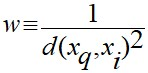

Usually KNN is robust to noisy data since it is averaging the k-nearest neighbors.


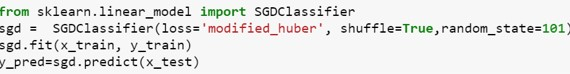

**Definition:** Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

**Advantages:** This algorithm is simple to implement, robust to noisy training data, and effective if training data is large.

**Disadvantages:** Need to determine the value of K and the computation cost is high as it needs to computer the distance of each instance to all the training samples.

error_rate = []
for i in range(1,51):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(8,4))
plt.plot(range(1,51),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [10]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [11]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[11489   946]
 [ 1784  2062]]
accuracy: 0.8323198820711258
precision: 0.6855053191489362
recall: 0.5361414456578263
f1 score:  0.6016924423694193


---
### 23.23 Naïve Bayes

Naive Bayes is a probabilistic classifier inspired by the Bayes theorem under a simple assumption which is the attributes are conditionally independent.

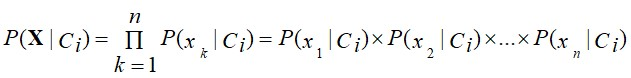

The classification is conducted by deriving the maximum posterior which is the maximal P(Ci|X) with the above assumption applying to Bayes theorem. This assumption greatly reduces the computational cost by only counting the class distribution. Even though the assumption is not valid in most cases since the attributes are dependent, surprisingly Naive Bayes has able to perform impressively.

Naive Bayes is a very simple algorithm to implement and good results have obtained in most cases. It can be easily scalable to larger datasets since it takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.

Naive Bayes can suffer from a problem called the zero probability problem. When the conditional probability is zero for a particular attribute, it fails to give a valid prediction. This needs to be fixed explicitly using a Laplacian estimator.

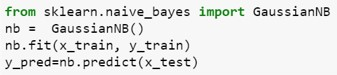

**Definition:** Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.

**Advantages:** This algorithm requires a small amount of training data to estimate the necessary parameters. Naive Bayes classifiers are extremely fast compared to more sophisticated methods.

**Disadvantages:** Naive Bayes is is known to be a bad estimator.

In [12]:
nb =  GaussianNB()
nb.fit(x_train, y_train)
y_pred=nb.predict(x_test)

In [13]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[10608  1827]
 [ 1412  2434]]
accuracy: 0.8010564461642405
precision: 0.5712274114057733
recall: 0.6328653146125846
f1 score:  0.6004687307265326


---
### 23.24 Stochastic Gradient Descent

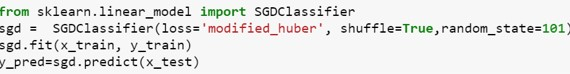

**Definition:** Stochastic gradient descent is a simple and very efficient approach to fit linear models. It is particularly useful when the number of samples is very large. It supports different loss functions and penalties for classification.

**Advantages:** Efficiency and ease of implementation.

**Disadvantages:** Requires a number of hyper-parameters and it is sensitive to feature scaling.

In [14]:
sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(x_train, y_train)
y_pred=sgd.predict(x_test)

In [15]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[11244  1191]
 [ 1456  2390]]
accuracy: 0.8374178490264725
precision: 0.6674113376151913
recall: 0.6214248569942797
f1 score:  0.643597684125488


---
### 23.25 Decision Tree

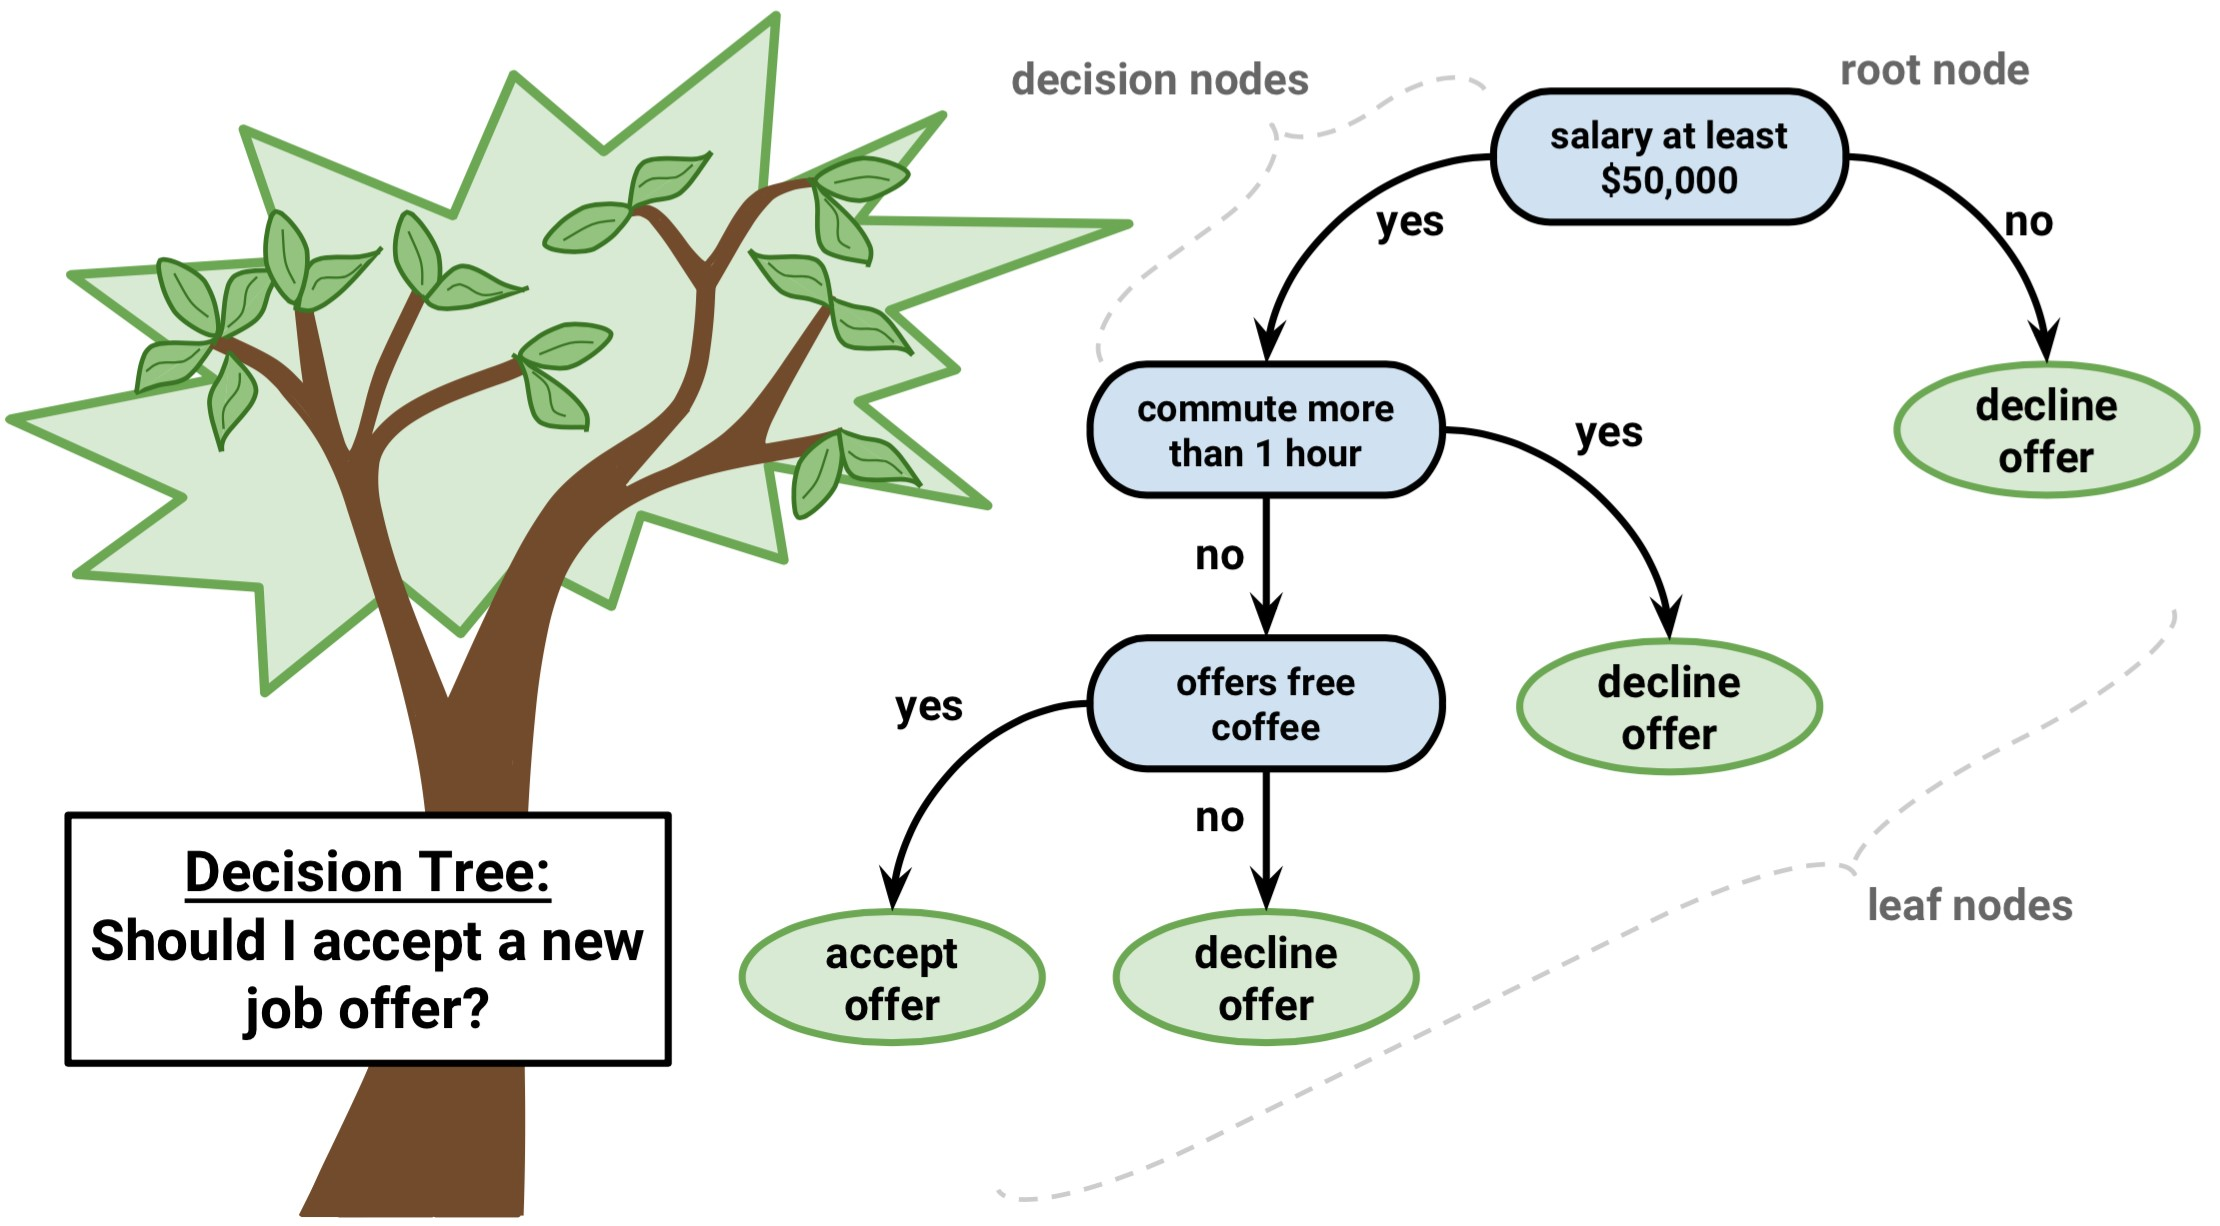

Decision tree builds classification or regression models in the form of a tree structure. It utilizes an if-then rule set which is mutually exclusive and exhaustive for classification. The rules are learned sequentially using the training data one at a time. Each time a rule is learned, the tuples covered by the rules are removed. This process is continued on the training set until meeting a termination condition.

The tree is constructed in a top-down recursive divide-and-conquer manner. All the attributes should be categorical. Otherwise, they should be discretized in advance. Attributes in the top of the tree have more impact towards in the classification and they are identified using the information gain concept.

A decision tree can be easily over-fitted generating too many branches and may reflect anomalies due to noise or outliers. An over-fitted model has a very poor performance on the unseen data even though it gives an impressive performance on training data. This can be avoided by pre-pruning which halts tree construction early or post-pruning which removes branches from the fully grown tree.

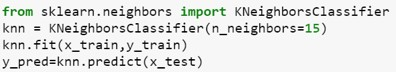

**Definition:** Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

**Advantages:** Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data.

**Disadvantages:** Decision tree can create complex trees that do not generalise well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

<AxesSubplot: >

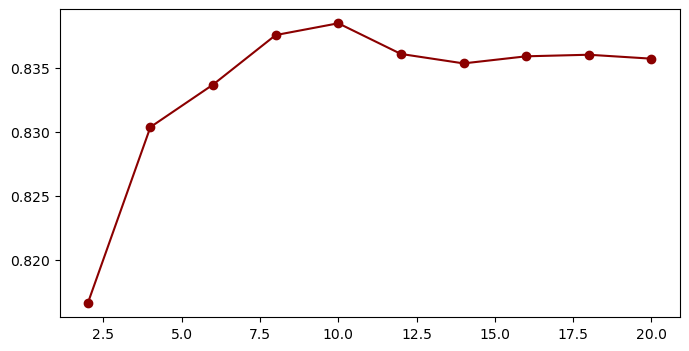

In [16]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

<AxesSubplot: >

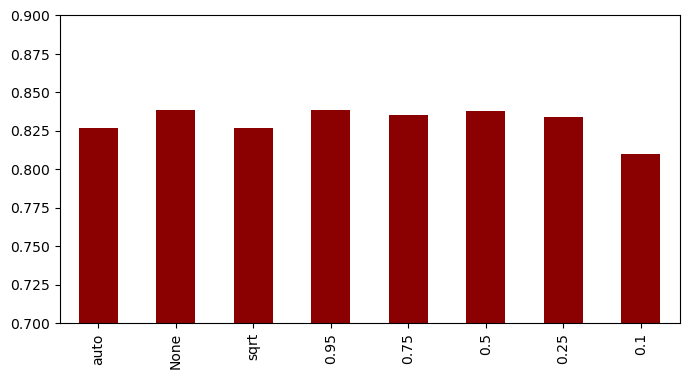

In [17]:
results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="darkred",ylim=(0.7,0.9))

<AxesSubplot: >

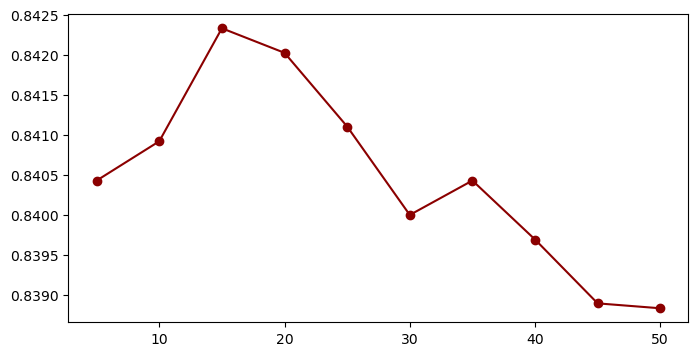

In [18]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")

In [19]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf = 15)
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)

In [20]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[11521   914]
 [ 1653  2193]]
accuracy: 0.8423315521159634
precision: 0.7058255551979401
recall: 0.5702028081123245
f1 score:  0.6308068459657701


---
### 23.26 Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees’ habit of over fitting to their training set.

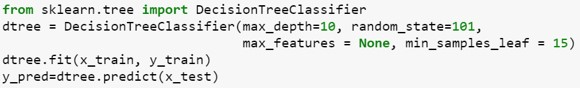

**Definition:** Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

**Advantages:** Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.

**Disadvantages:** Slow real time prediction, difficult to implement, and complex algorithm.

<AxesSubplot: >

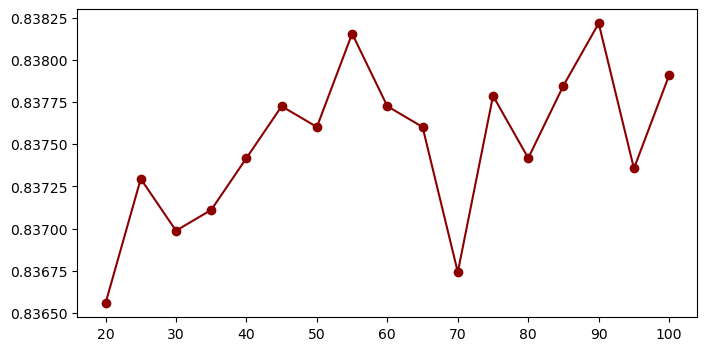

In [21]:
results = []
n_estimaor_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimaor_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")

<AxesSubplot: >

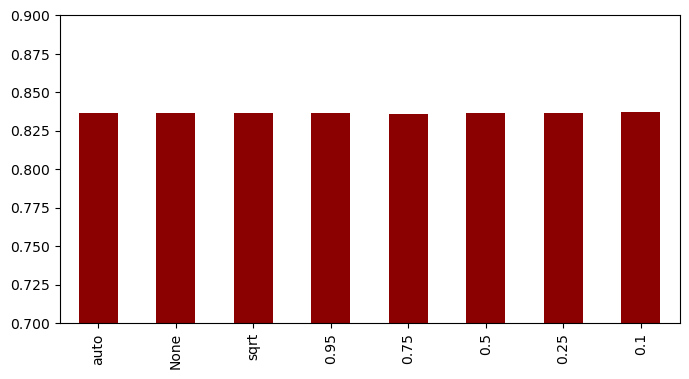

In [22]:
results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="darkred",ylim=(0.7,0.9))

<AxesSubplot: >

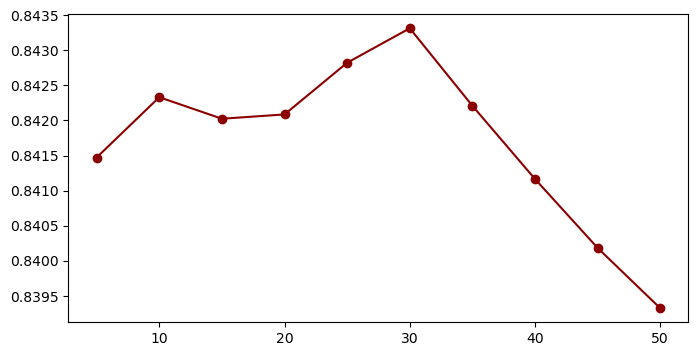

In [23]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")

In [24]:
rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = 30)
rfm.fit(x_train, y_train)
y_pred=rfm.predict(x_test)

In [25]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[11581   854]
 [ 1697  2149]]
accuracy: 0.8433142927338616
precision: 0.7156177156177156
recall: 0.5587623504940198
f1 score:  0.627536866695868


---
### 23.27 Support Vector Machine

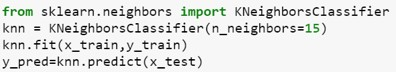

**Definition:** Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

**Advantages:** Effective in high dimensional spaces and uses a subset of training points in the decision function so it is also memory efficient.

**Disadvantages:** The algorithm does not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

In [26]:
svm =  SVC(kernel="rbf", C=0.025,random_state=101)
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)

In [27]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[11769   666]
 [ 2019  1827]]
accuracy: 0.8350838400589644
precision: 0.7328519855595668
recall: 0.4750390015600624
f1 score:  0.5764316138192144


In [28]:
svm =  SVC(kernel="linear", C=0.025,random_state=101)
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)

In [29]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[11625   810]
 [ 1781  2065]]
accuracy: 0.8408574411891161
precision: 0.7182608695652174
recall: 0.5369214768590743
f1 score:  0.6144918910876358


In [30]:
svm =  SVC(kernel="poly", C=0.025,random_state=101)
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)

In [31]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[11705   730]
 [ 1838  2008]]
accuracy: 0.8422701308273448
precision: 0.733382030679328
recall: 0.5221008840353614
f1 score:  0.6099635479951396


---
### 23.28 Artificial Neural Networks

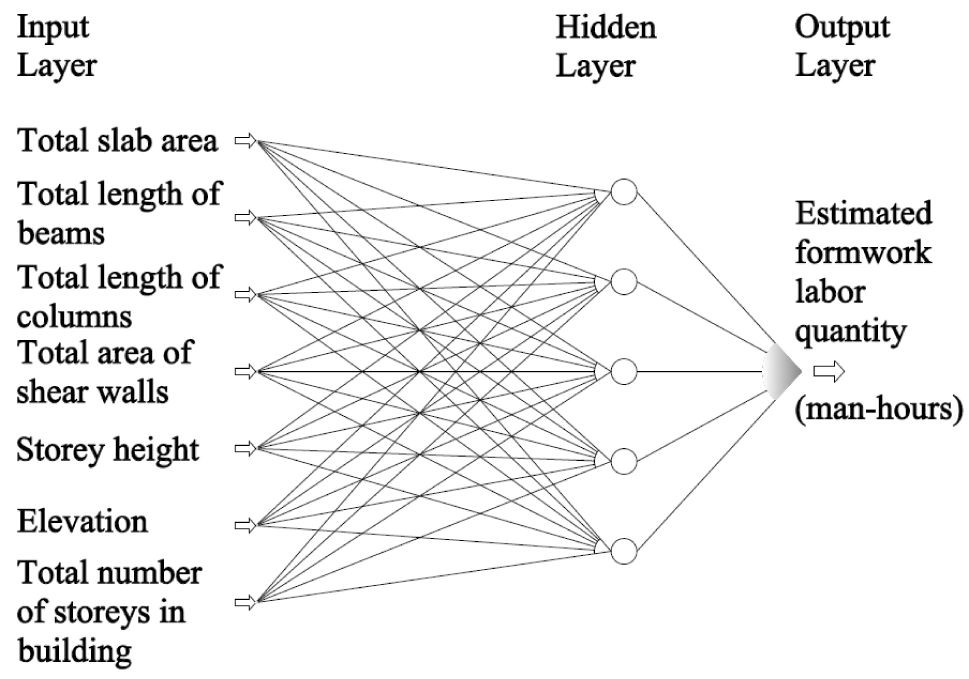

Artificial Neural Network is a set of connected input/output units where each connection has a weight associated with it started by psychologists and neurobiologists to develop and test computational analogs of neurons. During the learning phase, the network learns by adjusting the weights so as to be able to predict the correct class label of the input tuples.

There are many network architectures available now like Feed-forward, Convolutional, Recurrent etc. The appropriate architecture depends on the application of the model. For most cases feed-forward models give reasonably accurate results and especially for image processing applications, convolutional networks perform better.

There can be multiple hidden layers in the model depending on the complexity of the function which is going to be mapped by the model. Having more hidden layers will enable to model complex relationships such as deep neural networks.


However, when there are many hidden layers, it takes a lot of time to train and adjust wights. The other disadvantage of is the poor interpretability of model compared to other models like Decision Trees due to the unknown symbolic meaning behind the learned weights.


But Artificial Neural Networks have performed impressively in most of the real world applications. It is high tolerance to noisy data and able to classify untrained patterns. Usually, Artificial Neural Networks perform better with continuous-valued inputs and outputs.

*All of the above algorithms are eager learners since they train a model in advance to generalize the training data and use it for prediction later.*

In [32]:
# Build a simple neural network model
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(x_train, y_train, epochs=50, batch_size=8, verbose=2)

# Make predictions on the test set
y_pred_prob = nn_model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
4071/4071 - 17s - loss: 0.4016 - accuracy: 0.8213 - 17s/epoch - 4ms/step
Epoch 2/50
4071/4071 - 10s - loss: 0.3513 - accuracy: 0.8378 - 10s/epoch - 2ms/step
Epoch 3/50
4071/4071 - 13s - loss: 0.3419 - accuracy: 0.8414 - 13s/epoch - 3ms/step
Epoch 4/50
4071/4071 - 12s - loss: 0.3371 - accuracy: 0.8426 - 12s/epoch - 3ms/step
Epoch 5/50
4071/4071 - 14s - loss: 0.3348 - accuracy: 0.8432 - 14s/epoch - 3ms/step
Epoch 6/50
4071/4071 - 11s - loss: 0.3337 - accuracy: 0.8437 - 11s/epoch - 3ms/step
Epoch 7/50
4071/4071 - 8s - loss: 0.3326 - accuracy: 0.8445 - 8s/epoch - 2ms/step
Epoch 8/50
4071/4071 - 8s - loss: 0.3328 - accuracy: 0.8426 - 8s/epoch - 2ms/step
Epoch 9/50
4071/4071 - 9s - loss: 0.3319 - accuracy: 0.8439 - 9s/epoch - 2ms/step
Epoch 10/50
4071/4071 - 11s - loss: 0.3315 - accuracy: 0.8432 - 11s/epoch - 3ms/step
Epoch 11/50
4071/4071 - 16s - loss: 0.3317 - accuracy: 0.8440 - 16s/epoch - 4ms/step
Epoch 12/50
4071/4071 - 12s - loss: 0.3315 - accuracy: 0.8445 - 12s/epoch - 3ms/

---
## 23.3 Algorithm Selection

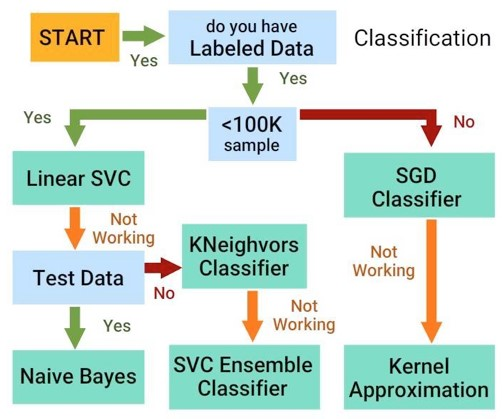


## 23.4 Evaluating a classifier


After training the model the most important part is to evaluate the classifier to verify its applicability.


---
### 23.41 Holdout method

There are several methods exists and the most common method is the holdout method. In this method, the given data set is divided into 2 partitions as test and train 20% and 80% respectively. The train set will be used to train the model and the unseen test data will be used to test its predictive power.


---
### 23.42 Cross-validation

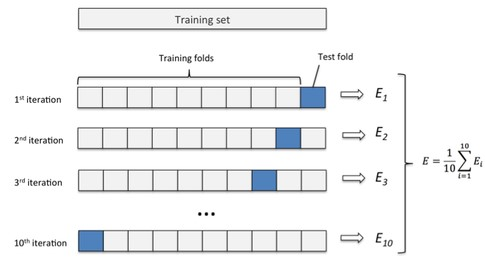

Over-fitting is a common problem in machine learning which can occur in most models. k-fold cross-validation can be conducted to verify that the model is not over-fitted. In this method, the data-set is randomly partitioned into k mutually exclusive subsets, each approximately equal size and one is kept for testing while others are used for training. This process is iterated throughout the whole k folds.


---
### 23.43 Precision and Recall

Precision is the fraction of relevant instances among the retrieved instances, while recall is the fraction of relevant instances that have been retrieved over the total amount of relevant instances. Precision and Recall are used as a measurement of the relevance.


---
### 23.44 ROC curve (Receiver Operating Characteristics)

ROC curve is used for visual comparison of classification models which shows the trade-off between the true positive rate and the false positive rate. The area under the ROC curve is a measure of the accuracy of the model. When a model is closer to the diagonal, it is less accurate and the model with perfect accuracy will have an area of 1.0


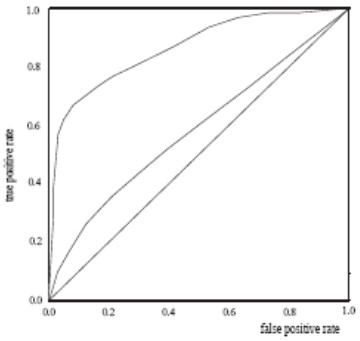